In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [3]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Removing The Spaces of column by " _ "

In [5]:
df.columns=df.columns.str.replace(' ','_')
df.head(6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


> Checking Null value

In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **plotting**

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

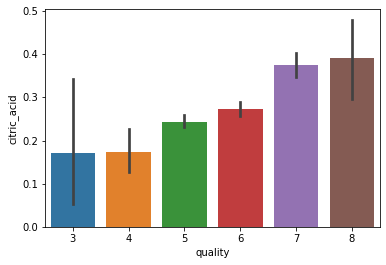

In [7]:
sns.barplot(x='quality',y='citric_acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

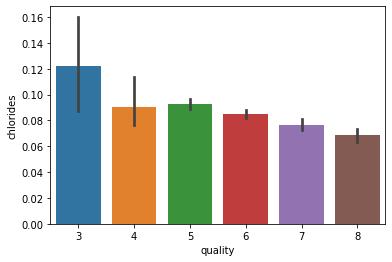

In [8]:
sns.barplot(x='quality',y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

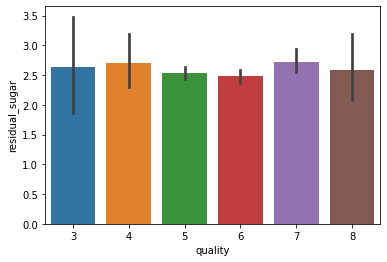

In [9]:
sns.barplot(x='quality',y='residual_sugar',data=df)

<AxesSubplot:xlabel='citric_acid', ylabel='fixed_acidity'>

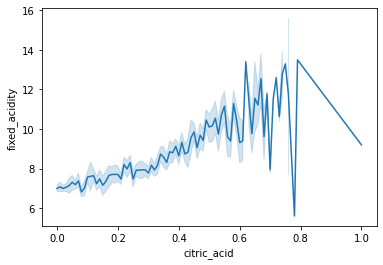

In [10]:
sns.lineplot(x='citric_acid',y='fixed_acidity',data=df)

In [11]:
def qualityUpdate(df):
    for i, row in df.iterrows():
        val=row['quality']
        if val<=6:
            df.at[i,'quality']=0
        else:
            df.at[i,'quality']=1
qualityUpdate(df)
    
    

In [12]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# > scaling 

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)


# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
reg=SVC()
reg

SVC()

In [21]:
reg.fit(xtrain,ytrain)

SVC()

In [22]:
reg.score(xtest,ytest)

0.875

In [23]:
yp=reg.predict(xtest)

# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

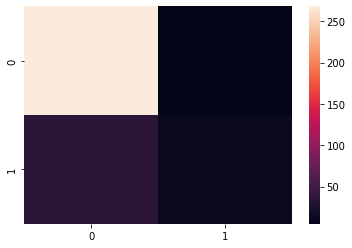

In [25]:
cm=confusion_matrix(ytest,yp)
sns.heatmap(cm)

# GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model=GridSearchCV(reg,{
    'C':[0.1,0.4,0.8,1.0,1.3],
    'gamma':[0.1,0.4,0.8,1.0,1.3],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)


In [28]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [29]:
model.score(xtest,ytest)

0.896875

In [30]:
model.best_params_

{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}

In [31]:
mod=SVC(C=1.3,gamma=1.0,kernel='rbf')

In [32]:
mod.fit(xtrain,ytrain)

SVC(C=1.3, gamma=1.0)

In [33]:
mod.score(xtest,ytest)

0.896875

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier(n_estimators=200)

In [36]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [37]:
rfc.score(xtest,ytest)

0.88125

# Cross_val_score

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
rfc2=cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)

In [40]:
rfc2.mean()

0.9101193405511812

# Prediction

In [41]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [42]:
a=[['6.0','0.3','0.4','2.4','0.02','10.0','30','0.99','4.5','0.55','12.0']]

In [43]:
mod.predict(a)

array([0])

In [44]:
model.predict(a)

array([0])

> model predict the quality is zero

# Saving a model

In [45]:
import pickle

In [46]:
model='mod.sav'
pickle.dump(mod,open(model,'wb'))

> If you like my notebook do upvote and comment
# ** Thanks